In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, fcluster, dendrogram

In [2]:
pd.set_option('display.max_columns', None)
df = pd.read_csv("/Users/ubokobongudofia/Desktop/X_customer_segmentation/cust_data.csv")

df.head(60)

,customer_id,loan_count,total_amount_overdue,maturity_dpd,total_missed_installment,has_14plus_dpd,count_14plus_dpd,tenor_in_months,ontime_repayment_rate,age,gender,marital_status,state,location,purpose,employment_status,dw_channel_key,total_loan_amount,income
0,44,2,10840.00,1,1,0,0,1.33,33.33,26,Female,NaN,Lagos,Ikeja,Uncategorized,EMPLOYED,WEB,33444.33,254.92
1,83,1,0.00,0,2,0,0,6.00,41.74,43,Male,Married,Lagos,Ifako-Ijaiye,Personal,EMPLOYED,oxygen,3449762.04,2798419.00
2,104,1,0.00,0,0,0,0,12.00,16.66,42,Male,Married,Lagos,Isolo,Personal,EMPLOYED,FSA,4419222.10,2847885.00
3,105,3,0.00,0,4,0,0,9.00,32.63,28,Female,Single,Ogun,Ogun,Personal,EMPLOYED,oxygen,3376049.42,200857.00
4,110,1,0.00,0,0,0,0,12.00,0.00,24,Female,Single,Lagos,Lagos,Personal,SELF_EMPLOYED,FSA,652267.75,200907.00
5,114,1,0.00,0,5,0,0,6.00,31.86,26,Female,Single,Lagos,Ikota,Housing,EMPLOYED,oxygen,2310442.62,201107.00
6,117,3,547783.60,0,12,1,1,12.00,0.00,28,Male,Single,Kwara,Ilorin,Personal,SELF_EMPLOYED,oxygen,7552396.72,201106.86
7,118,1,0.00,0,10,0,0,12.00,18.21,30,Female,Single,Lagos,Lagos,Utilities,SELF_EMPLOYED,oxygen,5312680.65,200857.00
8,119,1,0.00,0,36,0,0,12.00,15.19,31,Female,Single,Lagos,Shasha,Housing,EMPLOYED,oxygen,9285154.30,201107.00
9,124,3,0.00,0,3,0,0,12.12,21.87,30,Female,Single,Ogun,Sango ota,Housing,EMPLOYED,oxygen,7677417.63,201106.86


In [3]:
print(df.loc[df['income'].isnull() | (df['income'] == 0), ['customer_id', 'income']])

       customer_id  income
500           1552     0.0
1046          5141     0.0
1621         17248     0.0
2065         32356     0.0
3381         67036     0.0
3960         75739     0.0
4695         81523     0.0
6775        108189     0.0
7777        123894     0.0
10026       147536     0.0
10094       148384     0.0
10392       152358     0.0
10517       153940     0.0
11117       163007     0.0
12220       183161     0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12877 entries, 0 to 12876
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               12877 non-null  int64  
 1   loan_count                12877 non-null  int64  
 2   total_amount_overdue      12877 non-null  float64
 3   maturity_dpd              12877 non-null  int64  
 4   total_missed_installment  12877 non-null  int64  
 5   has_14plus_dpd            12877 non-null  int64  
 6   count_14plus_dpd          12877 non-null  int64  
 7   tenor_in_months           12877 non-null  float64
 8   ontime_repayment_rate     12877 non-null  float64
 9   age                       12877 non-null  int64  
 10  gender                    12877 non-null  object 
 11  marital_status            2568 non-null   object 
 12  state                     10977 non-null  object 
 13  location                  10991 non-null  object 
 14  purpos

In [5]:
percentiles = [0.05, 0.25, 0.5, 0.75, 0.95]
df.describe(percentiles=percentiles).transpose()

,count,mean,std,min,5%,25%,50%,75%,95%,max
customer_id,12877.0,1.005246e+05,5.546260e+04,44.00,1935.400,62899.00,103675.00,144536.00,1.834714e+05,1.993680e+05
loan_count,12877.0,1.247496e+00,5.999270e-01,1.00,1.000,1.00,1.00,1.00,2.000000e+00,7.000000e+00
total_amount_overdue,12877.0,3.210112e+05,1.130695e+06,0.00,0.000,0.00,20365.64,173321.37,1.683705e+06,5.907433e+07
maturity_dpd,12877.0,1.131017e+01,3.674433e+01,0.00,0.000,0.00,0.00,0.00,8.520000e+01,3.390000e+02
total_missed_installment,12877.0,5.204085e+00,9.033693e+00,0.00,0.000,0.00,2.00,6.00,2.100000e+01,9.000000e+01
has_14plus_dpd,12877.0,2.500582e-01,4.330631e-01,0.00,0.000,0.00,0.00,1.00,1.000000e+00,1.000000e+00
count_14plus_dpd,12877.0,7.222179e-01,1.707470e+00,0.00,0.000,0.00,0.00,1.00,4.000000e+00,1.300000e+01
tenor_in_months,12877.0,6.320688e+00,4.027959e+00,1.00,2.000,3.00,6.00,12.00,1.200000e+01,2.400000e+01
ontime_repayment_rate,12877.0,9.448360e+00,1.514188e+01,0.00,0.000,0.00,0.00,16.66,4.200000e+01,1.000000e+02
age,12877.0,3.619935e+01,8.899840e+00,18.00,24.000,29.00,35.00,42.00,5.300000e+01,1.400000e+02


In [6]:
df.isnull().sum()

customer_id                     0
loan_count                      0
total_amount_overdue            0
maturity_dpd                    0
total_missed_installment        0
has_14plus_dpd                  0
count_14plus_dpd                0
tenor_in_months                 0
ontime_repayment_rate           0
age                             0
gender                          0
marital_status              10309
state                        1900
location                     1886
purpose                         0
employment_status              48
dw_channel_key                  0
total_loan_amount               0
income                          0
dtype: int64

In [7]:
pd.set_option('display.max_rows', None)
null_ratio = df.isnull().sum() / df.notnull().sum()
null_ratio

customer_id                 0.000000
loan_count                  0.000000
total_amount_overdue        0.000000
maturity_dpd                0.000000
total_missed_installment    0.000000
has_14plus_dpd              0.000000
count_14plus_dpd            0.000000
tenor_in_months             0.000000
ontime_repayment_rate       0.000000
age                         0.000000
gender                      0.000000
marital_status              4.014408
state                       0.173089
location                    0.171595
purpose                     0.000000
employment_status           0.003742
dw_channel_key              0.000000
total_loan_amount           0.000000
income                      0.000000
dtype: float64

In [8]:
df = df[df['gender'] != 'Unknown']

In [9]:
df = df.dropna(subset=['age', 'dw_channel_key', 'income', 'gender'])

In [10]:
cat_vars = ['employment_status', 'marital_status', 'state', 'location']

from sklearn.preprocessing import OrdinalEncoder

# Step 2: Replace missing values with 'Others'
df[cat_vars] = df[cat_vars].fillna('Others')

In [11]:
df.isnull().sum()

customer_id                 0
loan_count                  0
total_amount_overdue        0
maturity_dpd                0
total_missed_installment    0
has_14plus_dpd              0
count_14plus_dpd            0
tenor_in_months             0
ontime_repayment_rate       0
age                         0
gender                      0
marital_status              0
state                       0
location                    0
purpose                     0
employment_status           0
dw_channel_key              0
total_loan_amount           0
income                      0
dtype: int64

In [12]:
total_missing = df.isnull().sum().sum()
print(total_missing)

0


In [13]:
df.columns.tolist()

['customer_id',
 'loan_count',
 'total_amount_overdue',
 'maturity_dpd',
 'total_missed_installment',
 'has_14plus_dpd',
 'count_14plus_dpd',
 'tenor_in_months',
 'ontime_repayment_rate',
 'age',
 'gender',
 'marital_status',
 'state',
 'location',
 'purpose',
 'employment_status',
 'dw_channel_key',
 'total_loan_amount',
 'income']

has_14plus_dpd
0    9639
1    3216
Name: count, dtype: int64


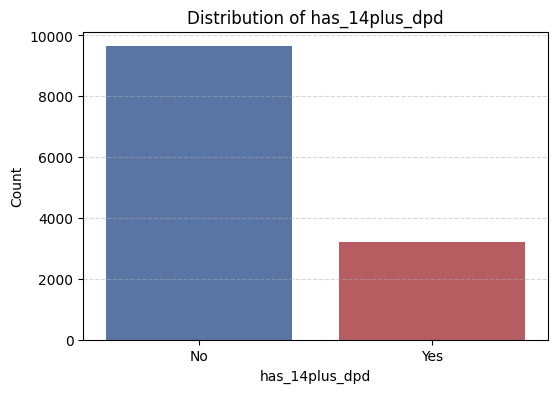

In [14]:
print(df['has_14plus_dpd'].value_counts())

plt.figure(figsize=(6,4))
sns.countplot(x='has_14plus_dpd', data=df, palette=['#4c72b0', '#c44e52'])
plt.title('Distribution of has_14plus_dpd')
plt.xlabel('has_14plus_dpd')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

In [15]:
df.describe(percentiles=[.05, .15,.25, .5, .75, .90, .95]).transpose()

,count,mean,std,min,5%,15%,25%,50%,75%,90%,95%,max
customer_id,12855.0,1.005371e+05,5.549647e+04,44.00,1928.700,27497.10,62885.50,103729.00,144570.000,173142.600,1.834921e+05,1.993680e+05
loan_count,12855.0,1.247764e+00,6.002873e-01,1.00,1.000,1.00,1.00,1.00,1.000,2.000,2.000000e+00,7.000000e+00
total_amount_overdue,12855.0,3.169964e+05,1.107973e+06,0.00,0.000,0.00,0.00,20350.02,172550.860,771528.900,1.673536e+06,5.907433e+07
maturity_dpd,12855.0,1.132563e+01,3.677144e+01,0.00,0.000,0.00,0.00,0.00,0.000,34.000,8.600000e+01,3.390000e+02
total_missed_installment,12855.0,5.194399e+00,9.031802e+00,0.00,0.000,0.00,0.00,1.00,6.000,15.000,2.100000e+01,9.000000e+01
has_14plus_dpd,12855.0,2.501750e-01,4.331306e-01,0.00,0.000,0.00,0.00,0.00,1.000,1.000,1.000000e+00,1.000000e+00
count_14plus_dpd,12855.0,7.226760e-01,1.708178e+00,0.00,0.000,0.00,0.00,0.00,1.000,3.000,4.000000e+00,1.300000e+01
tenor_in_months,12855.0,6.308961e+00,4.011978e+00,1.00,2.000,3.00,3.00,6.00,12.000,12.000,1.200000e+01,2.400000e+01
ontime_repayment_rate,12855.0,9.442951e+00,1.514412e+01,0.00,0.000,0.00,0.00,0.00,16.660,33.330,4.200000e+01,1.000000e+02
age,12855.0,3.620039e+01,8.902502e+00,18.00,24.000,27.00,29.00,35.00,42.000,49.000,5.300000e+01,1.400000e+02


/Users/ubokobongudofia/Desktop/X_customer_segmentation/venv/lib/python3.11/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


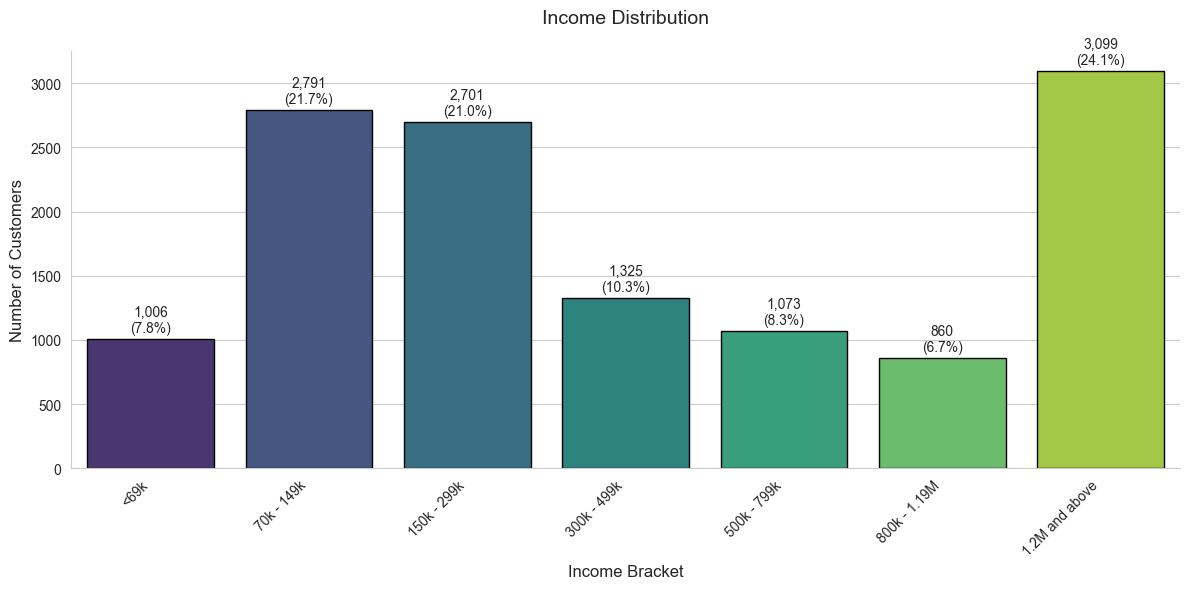

In [16]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))

# Half-open bins: [left, right)
bin_edges = [0, 70000, 150000, 300000, 500000, 800000, 1200000, float('inf')]
bin_labels = [
    "<69k",               # strictly less than 100k
    "70k - 149k",         # includes 100k, excludes 200k
    "150k - 299k",         # includes 200k, excludes 400k
    "300k - 499k",         # includes 400k, excludes 1M
    "500k - 799k",           # includes 1M, excludes 5M
    "800k - 1.19M",           # includes 5M, excludes 10M
    "1.2M and above"        # 40M and higher
]

df['income_bracket'] = pd.cut(
    df['income'],
    bins=bin_edges,
    labels=bin_labels,
    right=False,          # left-inclusive, right-exclusive
    include_lowest=True   # includes 0 in the first bin
)

bracket_counts = df['income_bracket'].value_counts().sort_index()

ax = sns.barplot(
    x=bracket_counts.index, 
    y=bracket_counts.values, 
    palette="viridis",
    edgecolor='black'
)

plt.title('Income Distribution', fontsize=14, pad=20)
plt.xlabel('Income Bracket', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right')

total = len(df)
for p in ax.patches:
    height = p.get_height()
    ax.text(
        p.get_x() + p.get_width()/2.,
        height + 0.01*max(bracket_counts),
        f'{int(height):,}\n({height/total:.1%})',
        ha='center',
        va='bottom',
        fontsize=10
    )

sns.despine()
plt.tight_layout()
plt.show()


In [17]:
# Drop all rows where age is greater than 65
df = df[df['age'] <= 65]

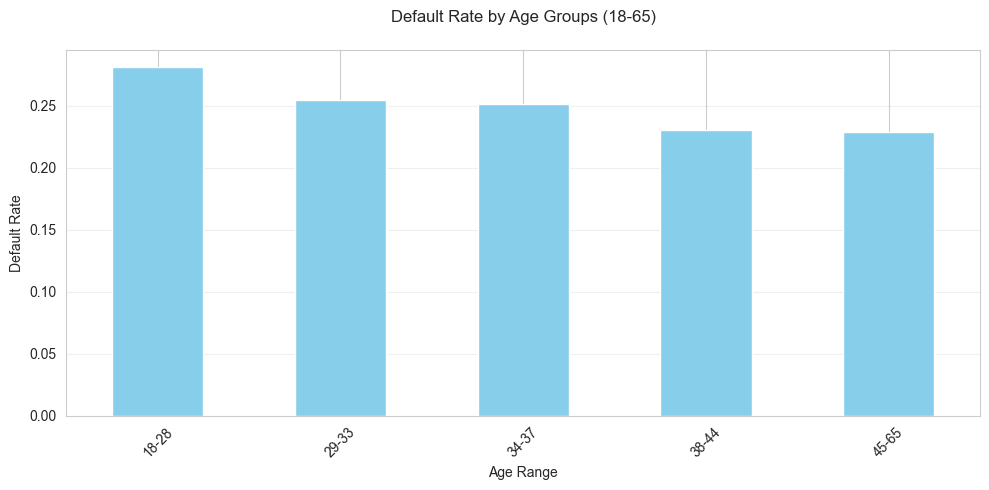


Five Balanced Age Groups:
18-28 years: 2,685 customers | Default Rate = 28.1%
29-33 years: 3,076 customers | Default Rate = 25.5%
34-37 years: 2,062 customers | Default Rate = 25.1%
38-44 years: 2,671 customers | Default Rate = 23.1%
45-65 years: 2,354 customers | Default Rate = 22.9%


In [18]:
# Calculate default rate by age
age_default = df.groupby('age')['has_14plus_dpd'].mean().sort_index()

# Set age range parameters
min_age = 18  
max_age = 65  
target_groups = 4  # This will create 5 groups (n+1 boundaries)

# 1. Create initial bins based on customer distribution percentiles
percentiles = [0, 0.2, 0.4, 0.6, 0.8, 1.0]
age_bins = [int(df['age'].quantile(q)) for q in percentiles]
age_bins = [min_age] + age_bins[1:-1] + [max_age]   # ✅ start at 18 instead of 17

# 2. Adjust bins to ensure minimum group size (no group < 5)
min_group_size = len(df) // target_groups * 0.5  # At least half of the average group size

for i in range(1, len(age_bins)-1):
    lower = age_bins[i-1]
    upper = age_bins[i]
    group_size = ((df['age'] >= lower) & (df['age'] < upper)).sum()

    if group_size < min_group_size:
        # Merge with the previous group if it's too small
        age_bins[i] = age_bins[i-1]

# Remove duplicate bins
age_bins = sorted(list(set(age_bins)))
age_bins = [x for i, x in enumerate(age_bins) if i == 0 or x > age_bins[i-1]]

# 3. Ensure exactly 5 groups by adjusting intervals
while len(age_bins) < target_groups + 1:
    # Find the largest interval and split it
    intervals = [(age_bins[i+1] - age_bins[i], i) for i in range(len(age_bins)-1)]
    max_interval = max(intervals)
    split_point = age_bins[max_interval[1]] + (max_interval[0] // 2)
    age_bins.append(split_point)
    age_bins = sorted(list(set(age_bins)))

# ✅ Ensure bins start at 18 and end at 65 cleanly
age_bins = [min_age] + [x for x in age_bins if min_age < x < max_age] + [max_age]

# 4. Create human-readable labels with clear boundaries
labels = []
for i in range(len(age_bins)-1):
    lower = int(age_bins[i])
    upper = int(age_bins[i+1])
    
    # For human readability, make boundaries non-overlapping
    if i > 0:  # All groups except the first
        lower_bound = lower + 1
    else:
        lower_bound = lower
        
    labels.append(f"{lower_bound}-{upper}")

# Create ordered categories
age_categories = pd.CategoricalDtype(categories=labels, ordered=True)
df['age_category'] = pd.cut(
    df['age'],
    bins=age_bins,
    labels=labels,
    right=True,
    include_lowest=True
).astype(age_categories)

# 5. Visualize and print results
plt.figure(figsize=(10,5))
default_rates = df.groupby('age_category', observed=True)['has_14plus_dpd'].mean()
default_rates.plot(kind='bar', color='skyblue')
plt.title(f"Default Rate by Age Groups (18-65)", pad=20)
plt.ylabel("Default Rate")
plt.xlabel("Age Range")
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("\nFive Balanced Age Groups:")
for cat in df['age_category'].cat.categories:
    count = (df['age_category'] == cat).sum()
    rate = df[df['age_category'] == cat]['has_14plus_dpd'].mean()
    if count > 0:  # Only show groups with customers
        print(f"{cat} years: {count:,} customers | Default Rate = {rate:.1%}")



In [19]:
df.columns.tolist()

['customer_id',
 'loan_count',
 'total_amount_overdue',
 'maturity_dpd',
 'total_missed_installment',
 'has_14plus_dpd',
 'count_14plus_dpd',
 'tenor_in_months',
 'ontime_repayment_rate',
 'age',
 'gender',
 'marital_status',
 'state',
 'location',
 'purpose',
 'employment_status',
 'dw_channel_key',
 'total_loan_amount',
 'income',
 'income_bracket',
 'age_category']

In [20]:
dem = ['gender', 'dw_channel_key', 'marital_status',]
for i in dem:
    print(f'\n value counts for {i}')
    print(df[i].value_counts(dropna=False))


 value counts for gender
gender
Male      9983
Female    2865
Name: count, dtype: int64

 value counts for dw_channel_key
dw_channel_key
WEB           8043
FSA           3816
TSA            414
ANDROID        408
IOS            117
Oxygen Now      36
oxygen          14
Name: count, dtype: int64

 value counts for marital_status
marital_status
Others       10287
Married       1611
Single         937
Separated        7
Divorced         5
Widowed          1
Name: count, dtype: int64


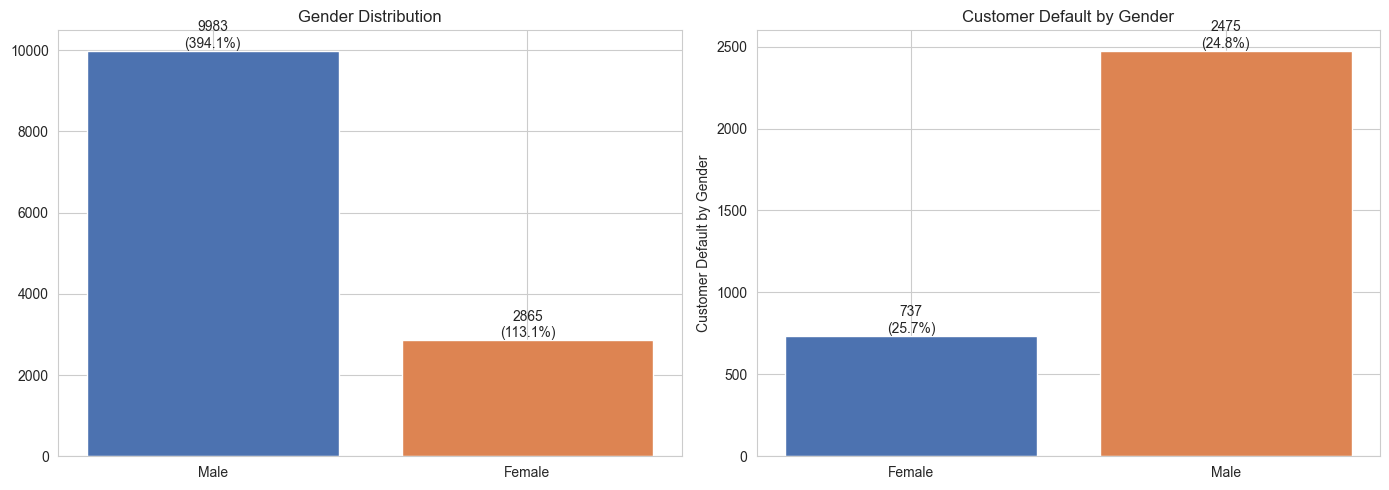

In [21]:
# Gender distribution with exact counts
gender_counts = df['gender'].value_counts()
gender_risk = df.groupby('gender')['has_14plus_dpd'].agg(['sum','count'])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,5))

# Plot 1: Gender distribution
bars = ax1.bar(gender_counts.index, gender_counts.values, color=['#4c72b0','#dd8452'])
ax1.set_title(f'Gender Distribution')
ax1.bar_label(bars, fmt='%d\n(%.1f%%)', 
             labels=[f"{v}\n({v/2533*100:.1f}%)" for v in gender_counts.values])

# Plot 2: Overdue counts by gender
bars = ax2.bar(gender_risk.index, gender_risk['sum'], color=['#4c72b0','#dd8452'])
ax2.set_title('Customer Default by Gender')
ax2.bar_label(bars, fmt='%d\n(%.1f%%)', 
             labels=[f"{row['sum']}\n({row['sum']/row['count']*100:.1f}%)" 
                    for _, row in gender_risk.iterrows()])
ax2.set_ylabel('Customer Default by Gender')

plt.tight_layout()
plt.show()

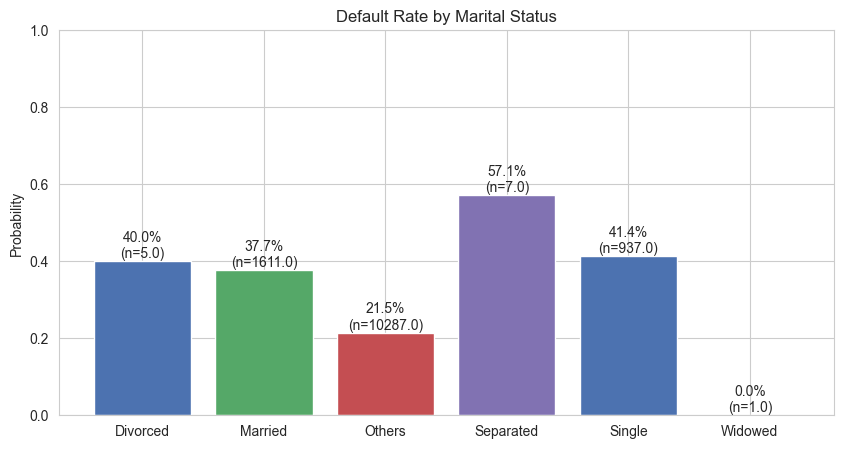

In [22]:
marital_risk = df.groupby('marital_status')['has_14plus_dpd'].agg(['mean','count'])

plt.figure(figsize=(10,5))
bars = plt.bar(marital_risk.index, marital_risk['mean'], color=['#4c72b0','#55a868','#c44e52','#8172b2'])
plt.title('Default Rate by Marital Status')
plt.ylabel('Probability')
plt.ylim(0, 1)  # Force 0-1 scale

# Annotate with both counts and percentages
for i, bar in enumerate(bars):
    height = bar.get_height()
    label = marital_risk.index[i]
    count = marital_risk.iloc[i]['count']
    plt.text(bar.get_x() + bar.get_width()/2., height,
             f'{height:.1%}\n(n={count})',
             ha='center', va='bottom')

plt.show()

In [23]:
print(df.columns.tolist())

['customer_id', 'loan_count', 'total_amount_overdue', 'maturity_dpd', 'total_missed_installment', 'has_14plus_dpd', 'count_14plus_dpd', 'tenor_in_months', 'ontime_repayment_rate', 'age', 'gender', 'marital_status', 'state', 'location', 'purpose', 'employment_status', 'dw_channel_key', 'total_loan_amount', 'income', 'income_bracket', 'age_category']


In [24]:
metrics = ['loan_count', 'total_loan_amount', 'maturity_dpd', 'tenor_in_months']
summary = df[metrics].agg(['min', 'mean', 'median', 'max']).rename(index={
    'min': 'Best Case',
    'mean': 'Average',
    'median': 'Median',
    'max': 'Worst Case'
})

# Add count annotation
summary.loc['Sample Size'] = [len(df)] * len(metrics)

print(f"Loan Performance Snapshot (n={len(df)})")
display(
    summary.style
    .format('{:,.0f}')
    .background_gradient(cmap='Blues', subset=pd.IndexSlice[['Best Case', 'Average', 'Median', 'Worst Case'], :])
    .set_properties(**{'font-weight': 'bold'}, subset=pd.IndexSlice['Sample Size', :])
)

Loan Performance Snapshot (n=12848)


,loan_count,total_loan_amount,maturity_dpd,tenor_in_months
Best Case,1,"10,931",0,1
Average,1,"3,630,507",11,6
Median,1,"879,682",0,6
Worst Case,7,"667,582,363",339,24
Sample Size,"12,848","12,848","12,848","12,848"


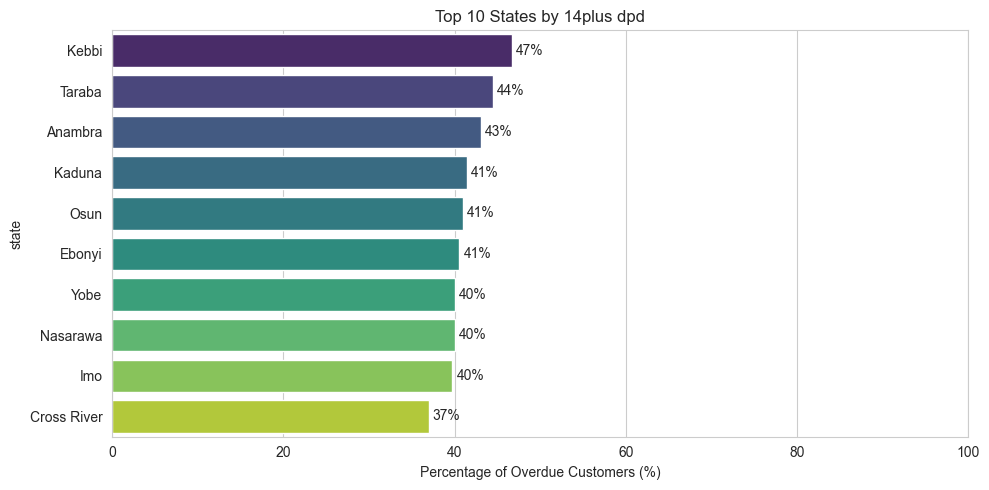

In [25]:
state_risk = df.groupby('state')['has_14plus_dpd'].mean()\
               .sort_values(ascending=False).head(10)

plt.figure(figsize=(10,5))
ax = sns.barplot(x=state_risk.values*100, y=state_risk.index, palette='viridis')

# Annotate with percentage only
for p in ax.patches:
    width = p.get_width()
    ax.text(width+0.5, p.get_y()+p.get_height()/2, 
            f'{width:.0f}%', 
            ha='left', va='center')

plt.title('Top 10 States by 14plus dpd')
plt.xlabel('Percentage of Overdue Customers (%)')
plt.xlim(0, 100)  # Ensures 0-100% scale
plt.tight_layout()
plt.show()

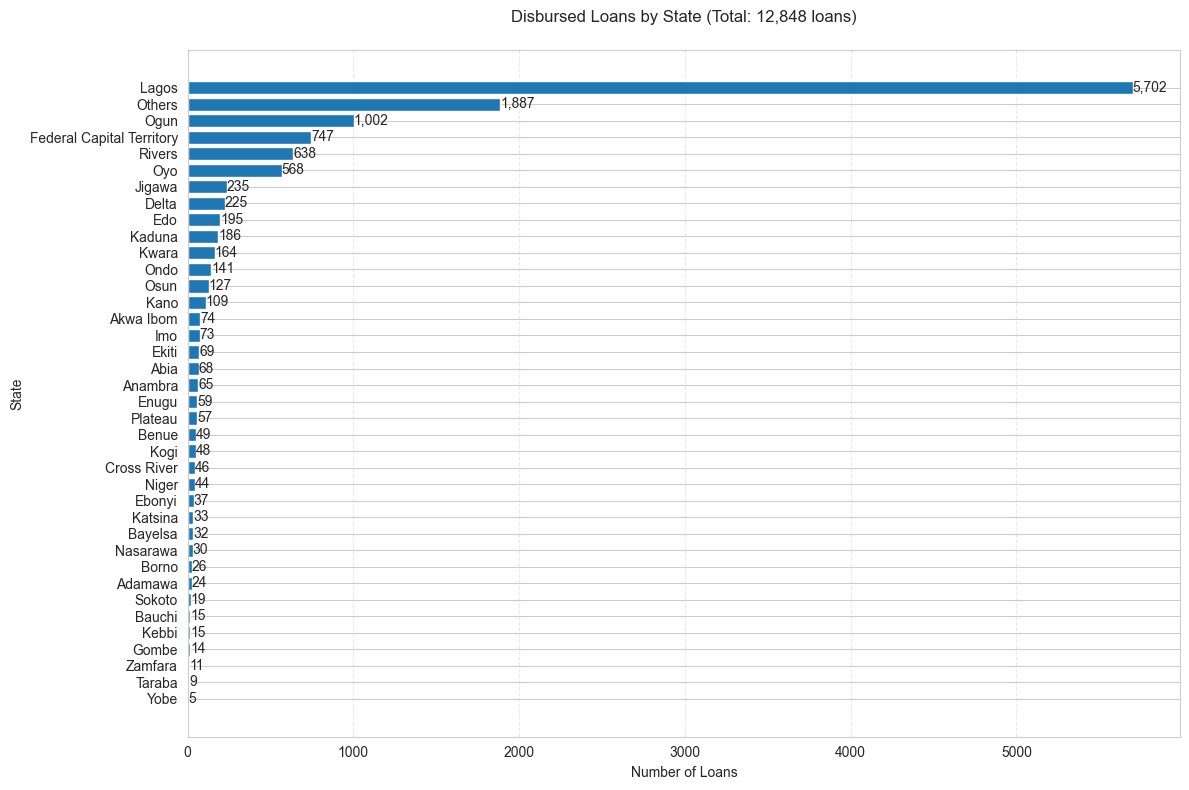

In [26]:
# Count loans per state and sort
state_loans = df['state'].value_counts().sort_values(ascending=True)

# Plot
plt.figure(figsize=(12, 8))
bars = plt.barh(state_loans.index, state_loans.values, color='#1f77b4')

# Annotate exact counts
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:,}', 
             va='center', ha='left', fontsize=10)

plt.title(f'Disbursed Loans by State (Total: {len(df):,} loans)', pad=20)
plt.xlabel('Number of Loans')
plt.ylabel('State')
plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

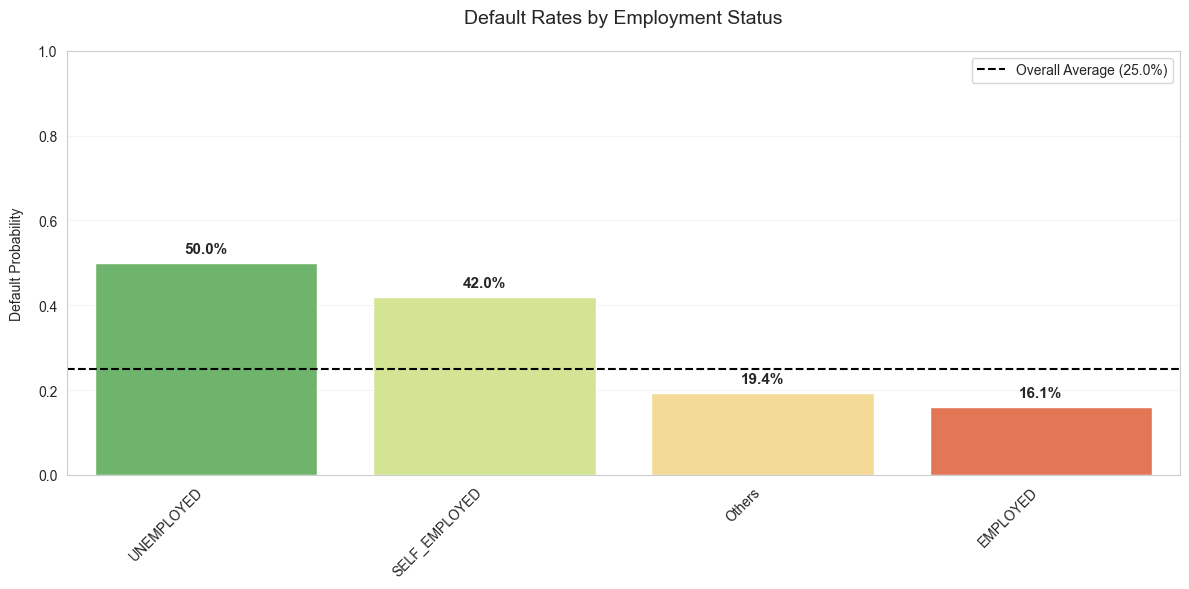

In [27]:
# Calculate metrics
employment_risk = df.groupby('employment_status')['has_14plus_dpd'].agg(['mean', 'count'])\
                   .sort_values('mean', ascending=False)

plt.figure(figsize=(12, 6))
ax = sns.barplot(
    x=employment_risk.index,
    y=employment_risk['mean'],
    order=employment_risk.index,
    palette='RdYlGn_r',  # Red-to-green (high-to-low risk)
    saturation=0.8
)

# Add percentage labels
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.1%}",  # Format as percentage with 1 decimal
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center', va='center',
        xytext=(0, 10),
        textcoords='offset points',
        fontsize=11,
        fontweight='bold'
    )

# Reference line and formatting
overall_mean = df['has_14plus_dpd'].mean()
plt.axhline(
    overall_mean,
    color='black',
    linestyle='--',
    linewidth=1.5,
    label=f'Overall Average ({overall_mean:.1%})'
)

plt.title('Default Rates by Employment Status', pad=20, fontsize=14)
plt.xlabel('')
plt.ylabel('Default Probability', labelpad=10)
plt.ylim(0, 1)  # Ensures 0-100% scale
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.2)
plt.legend(bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()

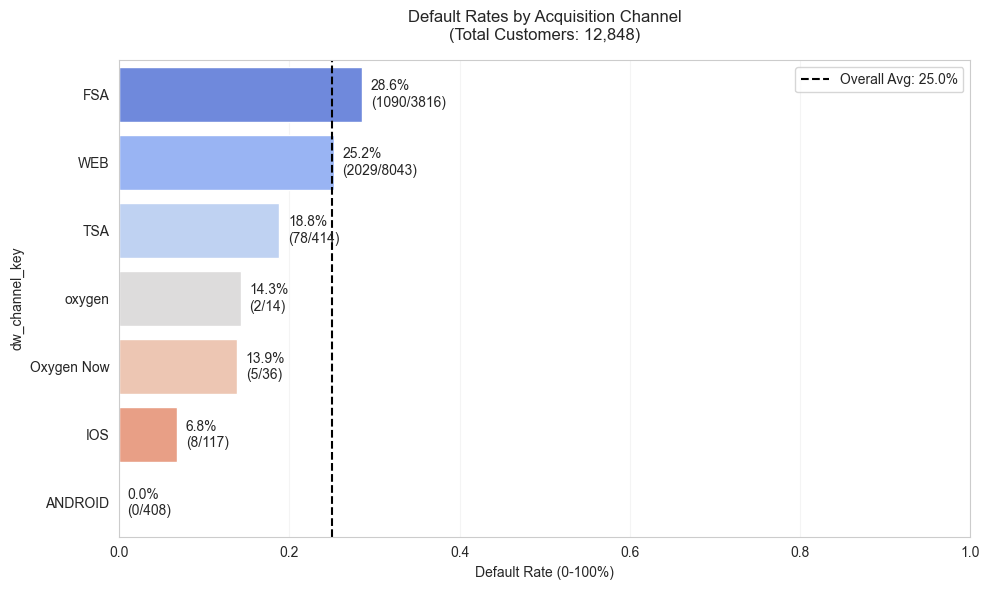

In [28]:
# Calculate metrics
channel_risk = df.groupby('dw_channel_key').agg({
    'has_14plus_dpd': ['mean', 'sum'],
    'customer_id': 'count'
}).sort_values(('has_14plus_dpd', 'mean'), ascending=False)

# Flatten multi-index columns
channel_risk.columns = ['overdue_rate', 'overdue_customers', 'total_customers']

plt.figure(figsize=(10, 6))
ax = sns.barplot(
    x='overdue_rate',
    y=channel_risk.index,
    data=channel_risk,
    palette='coolwarm',
    saturation=0.8
)

# Add percentage and count labels
for i, (rate, overdue, total) in enumerate(zip(
    channel_risk['overdue_rate'],
    channel_risk['overdue_customers'],
    channel_risk['total_customers']
)):
    ax.text(
        rate + 0.01,  # Position text just right of the bar
        i,            # Match y-position with current channel
        f'{rate:.1%}\n({overdue:.0f}/{total:.0f})',
        va='center',
        ha='left',
        fontsize=10
    )

# Formatting
plt.title('Default Rates by Acquisition Channel\n(Total Customers: {:,})'.format(len(df)), pad=15)
plt.xlabel('Default Rate (0-100%)')
plt.xlim(0, 1)  # Ensures 0-100% scale
plt.axvline(df['has_14plus_dpd'].mean(), color='black', linestyle='--', label=f'Overall Avg: {df["has_14plus_dpd"].mean():.1%}')
plt.grid(axis='x', alpha=0.2)
plt.legend()

plt.tight_layout()
plt.show()

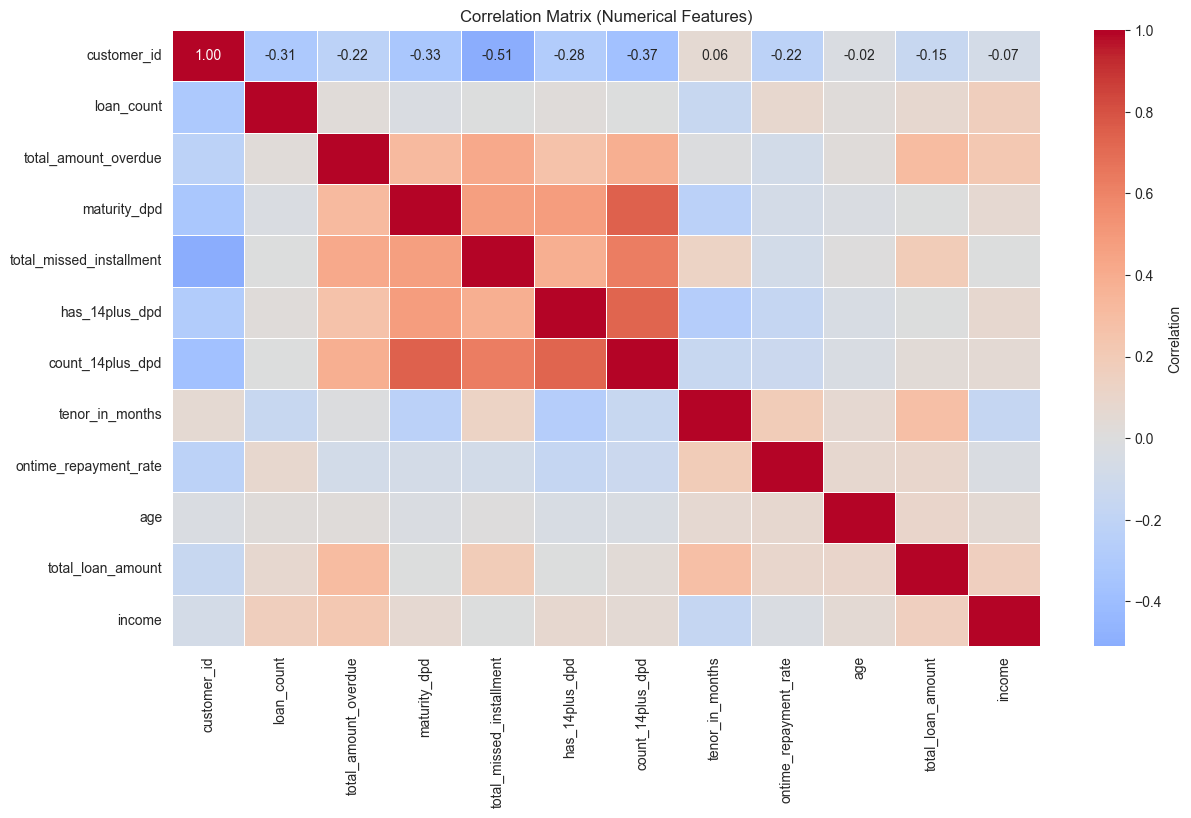

In [29]:
plt.figure(figsize=(14,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", center=0, linewidths=0.5, cbar_kws={'label': 'Correlation'})
plt.title("Correlation Matrix (Numerical Features)")
plt.show()

In [30]:
print(df.columns.tolist())

['customer_id', 'loan_count', 'total_amount_overdue', 'maturity_dpd', 'total_missed_installment', 'has_14plus_dpd', 'count_14plus_dpd', 'tenor_in_months', 'ontime_repayment_rate', 'age', 'gender', 'marital_status', 'state', 'location', 'purpose', 'employment_status', 'dw_channel_key', 'total_loan_amount', 'income', 'income_bracket', 'age_category']


In [31]:
df.head()

,customer_id,loan_count,total_amount_overdue,maturity_dpd,total_missed_installment,has_14plus_dpd,count_14plus_dpd,tenor_in_months,ontime_repayment_rate,age,gender,marital_status,state,location,purpose,employment_status,dw_channel_key,total_loan_amount,income,income_bracket,age_category
0,44,2,10840.0,1,1,0,0,1.33,33.33,26,Female,Others,Lagos,Ikeja,Uncategorized,EMPLOYED,WEB,33444.33,254.92,<69k,18-28
1,83,1,0.0,0,2,0,0,6.00,41.74,43,Male,Married,Lagos,Ifako-Ijaiye,Personal,EMPLOYED,oxygen,3449762.04,2798419.00,1.2M and above,38-44
2,104,1,0.0,0,0,0,0,12.00,16.66,42,Male,Married,Lagos,Isolo,Personal,EMPLOYED,FSA,4419222.10,2847885.00,1.2M and above,38-44
3,105,3,0.0,0,4,0,0,9.00,32.63,28,Female,Single,Ogun,Ogun,Personal,EMPLOYED,oxygen,3376049.42,200857.00,150k - 299k,18-28
4,110,1,0.0,0,0,0,0,12.00,0.00,24,Female,Single,Lagos,Lagos,Personal,SELF_EMPLOYED,FSA,652267.75,200907.00,150k - 299k,18-28


In [32]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Data Preparation (exactly as in your original code)
demographic_features = ['gender', 'marital_status', 'purpose', 'employment_status', 'dw_channel_key']
for feature in demographic_features:
    df[feature] = df[feature].astype('category').cat.codes

df[demographic_features].head()

,gender,marital_status,purpose,employment_status,dw_channel_key
0,0,2,12,0,5
1,1,1,8,0,6
2,1,1,8,0,1
3,0,4,8,0,6
4,0,4,8,2,1


In [33]:
# Create working copy with payment behavior features only
working_df = df[['customer_id', 'total_missed_installment', 'total_amount_overdue', 
                'tenor_in_months', 'total_loan_amount', 'maturity_dpd',
                'has_14plus_dpd', 'count_14plus_dpd', 'ontime_repayment_rate']].copy()

# Payment Behavior
working_df['missed_payment_ratio'] = working_df['total_missed_installment'] / (working_df['tenor_in_months'] + 1e-6)
working_df['overdue_utilization'] = working_df['total_amount_overdue'] / (working_df['total_loan_amount'] + 1e-6)

# Customer Value
working_df['monthly_loan_volume'] = working_df['total_loan_amount'] / (working_df['tenor_in_months'] + 1e-6)
working_df['repayment_efficiency'] = working_df['ontime_repayment_rate'] / 100  # Convert to 0-1 scale


In [34]:
working_df.head()

,customer_id,total_missed_installment,total_amount_overdue,tenor_in_months,total_loan_amount,maturity_dpd,has_14plus_dpd,count_14plus_dpd,ontime_repayment_rate,missed_payment_ratio,overdue_utilization,monthly_loan_volume,repayment_efficiency
0,44,1,10840.0,1.33,33444.33,1,0,0,33.33,0.751879,0.324121,25146.093875,0.3333
1,83,2,0.0,6.00,3449762.04,0,0,0,41.74,0.333333,0.000000,574960.244173,0.4174
2,104,0,0.0,12.00,4419222.10,0,0,0,16.66,0.000000,0.000000,368268.477644,0.1666
3,105,4,0.0,9.00,3376049.42,0,0,0,32.63,0.444444,0.000000,375116.560543,0.3263
4,110,0,0.0,12.00,652267.75,0,0,0,0.00,0.000000,0.000000,54355.641304,0.0000


In [35]:
percentiles = [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99]
working_df.describe(percentiles=percentiles).transpose()

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,95%,99%,max
customer_id,12848.0,1.005503e+05,5.550020e+04,44.000000,367.470000,1928.350000,10283.400000,62886.250000,103808.000000,1.445758e+05,1.731496e+05,1.835050e+05,1.964027e+05,1.993680e+05
total_missed_installment,12848.0,5.193960e+00,9.033769e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000e+00,1.500000e+01,2.100000e+01,4.500000e+01,9.000000e+01
total_amount_overdue,12848.0,3.166970e+05,1.107954e+06,0.000000,0.000000,0.000000,0.000000,0.000000,20312.110000,1.722639e+05,7.715289e+05,1.671454e+06,4.676077e+06,5.907433e+07
tenor_in_months,12848.0,6.310531e+00,4.012433e+00,1.000000,1.000000,2.000000,3.000000,3.000000,6.000000,1.200000e+01,1.200000e+01,1.200000e+01,1.200000e+01,2.400000e+01
total_loan_amount,12848.0,3.630507e+06,1.363042e+07,10930.830000,30503.250000,76864.076000,130479.430000,291243.070000,879682.120000,3.115176e+06,7.892511e+06,1.332096e+07,3.909875e+07,6.675824e+08
maturity_dpd,12848.0,1.131375e+01,3.676600e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,3.400000e+01,8.500000e+01,1.970000e+02,3.390000e+02
has_14plus_dpd,12848.0,2.500000e-01,4.330296e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e-01,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
count_14plus_dpd,12848.0,7.221357e-01,1.707953e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.500000e-01,3.000000e+00,4.000000e+00,8.000000e+00,1.300000e+01
ontime_repayment_rate,12848.0,9.440205e+00,1.513823e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.666000e+01,3.333000e+01,4.200000e+01,5.648610e+01,1.000000e+02
missed_payment_ratio,12848.0,1.029722e+00,1.664992e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.333333,1.166666e+00,2.999999e+00,4.673655e+00,7.999997e+00,1.366666e+01


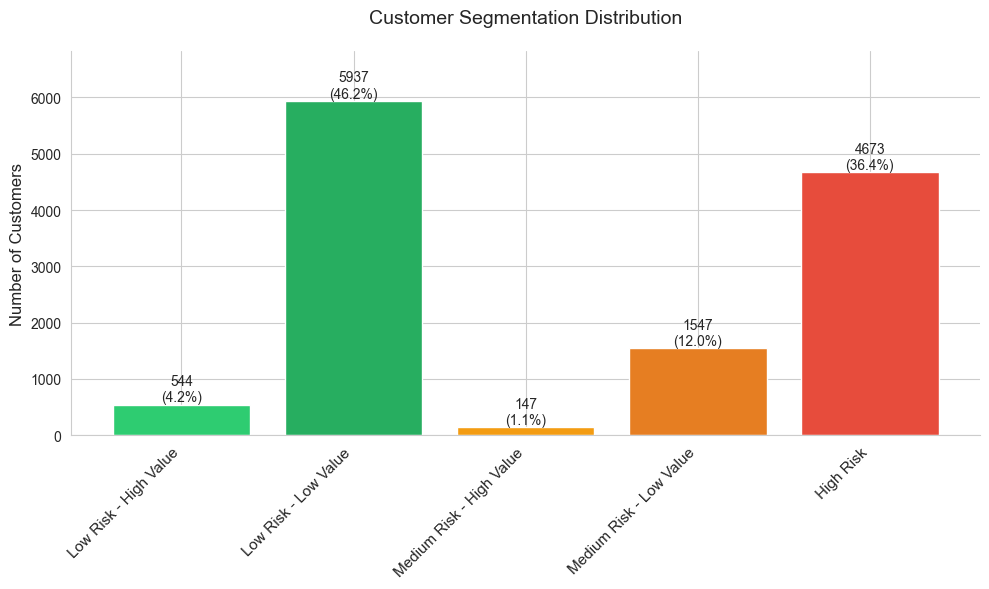

In [36]:
def segment_customer(row):
    # -------- RISK CLASSIFICATION (data-driven) --------
    if (
        row['count_14plus_dpd'] <= 0 and
        row['missed_payment_ratio'] <= 0.4 and
        row['maturity_dpd'] <= 0
    ):
        risk = 'Low'
        
    elif (
        row['count_14plus_dpd'] <= 1 and
        row['missed_payment_ratio'] <= 0.7 and
        row['maturity_dpd'] <= 14
    ):
        risk = 'Medium'
        
    else:
        return 'High Risk'

    value = 'High Value' if (
        row['monthly_loan_volume'] >= working_df['monthly_loan_volume'].quantile(0.75) and  
        row['repayment_efficiency'] >= 0.15                        
    ) else 'Low Value'
    
    return f"{risk} Risk - {value}"


working_df['segment'] = working_df.apply(segment_customer, axis=1)
# Define segment order
segment_order = [
    'Low Risk - High Value',
    'Low Risk - Low Value',
    'Medium Risk - High Value', 
    'Medium Risk - Low Value',
    'High Risk'
]

# Calculate counts and percentages
segment_counts = working_df['segment'].value_counts()[segment_order]
percentages = (segment_counts / len(working_df)) * 100

# Plot the distribution
plt.figure(figsize=(10, 6))
bars = plt.bar(segment_order, segment_counts, color=['#2ecc71', '#27ae60', '#f39c12', '#e67e22', '#e74c3c'])
for bar, count, pct in zip(bars, segment_counts, percentages):
    plt.text(bar.get_x() + bar.get_width()/2, 
             bar.get_height() + 5, 
             f'{count}\n({pct:.1f}%)',
             ha='center', va='bottom', fontsize=10)

plt.title('Customer Segmentation Distribution', fontsize=14, pad=20)
plt.ylabel('Number of Customers', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=11)
plt.ylim(0, max(segment_counts) * 1.15)
sns.despine()
plt.tight_layout()
plt.show()



In [37]:
import tabulate

# Calculate revenue for each customer: loan amount - overdue amount
working_df['revenue'] = working_df['total_loan_amount'] - working_df['total_amount_overdue']

# Group by segment and sum revenue
segment_revenue = working_df.groupby('segment')['revenue'].sum().sort_values(ascending=False)

# Calculate revenue share (% of total)
total_revenue = segment_revenue.sum()
segment_revenue_pct = (segment_revenue / total_revenue * 100).round(1)

# Combine into a clean DataFrame for presentation
revenue_summary = pd.DataFrame({
    'Segment': segment_revenue.index,
    'Total Revenue': segment_revenue.values,
    'Revenue Share (%)': segment_revenue_pct.values
}).sort_values('Total Revenue', ascending=False)

# Format for PowerPoint
revenue_table = revenue_summary.copy()
revenue_table['Total Revenue'] = revenue_table['Total Revenue'].apply(lambda x: f'N{x:,.0f}')
revenue_table['Revenue Share (%)'] = revenue_table['Revenue Share (%)'].apply(lambda x: f'{x}%')

print(revenue_table.to_markdown(index=False))  # Paste this into PPT

| Segment                  | Total Revenue   | Revenue Share (%)   |
|:-------------------------|:----------------|:--------------------|
| High Risk                | N20,815,606,575 | 48.9%               |
| Low Risk - Low Value     | N7,967,145,918  | 18.7%               |
| Low Risk - High Value    | N7,049,757,385  | 16.6%               |
| Medium Risk - Low Value  | N4,839,038,990  | 11.4%               |
| Medium Risk - High Value | N1,904,282,643  | 4.5%                |


In [38]:
# 1. Segment order
segment_order = [
    'Low Risk - High Value',
    'Low Risk - Low Value',
    'Medium Risk - High Value', 
    'Medium Risk - Low Value',
    'High Risk'
]

# 2. Define all demographic variables
all_demographics = demographic_features + ['age_category', 'income_bracket']

# 3. Merge demographics into working_df
working_df = working_df.merge(
    df[['customer_id'] + all_demographics],
    on='customer_id',
    how='left'
)

# 4. Calculate population_totals for expected proportions
population_totals = {}
for demo in all_demographics:
    population_totals[demo] = df[demo].value_counts()



In [39]:
df = working_df.dropna(subset=['age_category'])

In [40]:
category_counts = working_df['age_category'].value_counts(dropna=False).sort_index()
print(category_counts)


age_category
18-28    2685
29-33    3076
34-37    2062
38-44    2671
45-65    2354
Name: count, dtype: int64


In [41]:
pd.set_option("display.max_colwidth", None)
import itertools
import pandas as pd

# PARAMETERS (YOUR REQUESTED CHANGES)
OR_THRESHOLD = 1.2        # Keep OR threshold at 1.2
COVERAGE_THRESHOLD = 0.0 # Changed from 0.05 to 0.02 (2%)
MAX_COMBOS_PER_SEGMENT = 2 # Max 2 clusters per segment

def calculate_or(count, total_segment, pop_count, total_pop, eps=1e-6):
    observed = count / total_segment if total_segment > 0 else 0.0
    expected = pop_count / total_pop if total_pop > 0 else 0.0
    OR = observed / (expected + eps)
    return OR, observed, expected

combo_id_counter = 1
final_segment_profiles = {}

for segment in segment_order:
    segment_data = working_df[working_df['segment'] == segment].copy()
    seg_size = len(segment_data)
    total_size = len(df)
    
    print(f"\n{'='*70}")
    print(f"SEGMENT: {segment.upper()}  |  Total Customers: {seg_size}")
    print(f"{'='*70}")
    
    # Step 1: Find qualifying categories (OR ≥ 1.2)
    qualifying_categories = {}
    for demo in all_demographics:
        qualifying_categories[demo] = []
        cat_counts = segment_data[demo].value_counts(dropna=False)

        for value, count in cat_counts.items():
            pop_count = population_totals[demo].get(value, 0)
            OR, obs, exp = calculate_or(count, seg_size, pop_count, total_size)
            if OR >= OR_THRESHOLD:
                qualifying_categories[demo].append((value, OR, obs, exp, count))
    
    features_with_cats = [demo for demo, cats in qualifying_categories.items() if cats]
    if len(features_with_cats) < 2:
        print("Not enough qualifying features to form combinations (need ≥2).")
        continue

    selected_records = []
    
    # Step 2: Try largest combinations first (your original logic)
    for r in range(len(features_with_cats), 1, -1):
        combo_records = []
        
        for feature_subset in itertools.combinations(features_with_cats, r):
            category_options = [
                [(demo, cat[0]) for cat in qualifying_categories[demo]]
                for demo in feature_subset
            ]

            for category_combo in itertools.product(*category_options):
                # Create mask for this combination
                mask = pd.Series(True, index=segment_data.index)
                for demo, value in category_combo:
                    mask &= (segment_data[demo] == value)
                match_count = int(mask.sum())
                
                # Apply 2% coverage threshold (your requested change)
                if match_count / seg_size < COVERAGE_THRESHOLD:
                    continue

                # Calculate population stats
                pop_mask = pd.Series(True, index=df.index)
                for demo, value in category_combo:
                    pop_mask &= (df[demo] == value)
                pop_count = int(pop_mask.sum())

                OR, obs, exp = calculate_or(match_count, seg_size, pop_count, total_size)

                combo_records.append({
                    'Combination Size': r,
                    'Combination ID': f"C{combo_id_counter}",
                    'Combination': " | ".join([f"{demo}: {value}" for demo, value in category_combo]),
                    'Observed Proportion': round(obs, 4),
                    'Expected Proportion': round(exp, 4),
                    'OR': round(OR, 3),
                    'Count': match_count,
                    'Coverage': f"{match_count/seg_size:.1%}"  # Formatted as %
                })
                combo_id_counter += 1

        if combo_records:
            df_output = pd.DataFrame(combo_records)
            # Sort by coverage then OR (your original priority)
            df_output = df_output.sort_values(
                by=["Observed Proportion", "OR"],
                ascending=[False, False]
            ).head(MAX_COMBOS_PER_SEGMENT)  # Your requested max of 2
            
            selected_records = df_output
            break

    if len(selected_records) > 0:
        final_segment_profiles[segment] = selected_records
        print(f"Top {len(selected_records)} clusters for {segment}:")
        display(selected_records[['Combination ID', 'Combination', 'OR', 'Coverage', 'Count']])
    else:
        print(f"No combinations found with OR ≥ {OR_THRESHOLD} AND coverage ≥ {COVERAGE_THRESHOLD:.0%}")


SEGMENT: LOW RISK - HIGH VALUE  |  Total Customers: 544
Top 2 clusters for Low Risk - High Value:


,Combination ID,Combination,OR,Coverage,Count
0,C1,marital_status: 1 | purpose: 13 | employment_status: 1 | dw_channel_key: 1 | age_category: 45-65 | income_bracket: 1.2M and above,0.0,0.0%,0
1,C2,marital_status: 1 | purpose: 13 | employment_status: 1 | dw_channel_key: 1 | age_category: 45-65 | income_bracket: 500k - 799k,0.0,0.0%,0



SEGMENT: LOW RISK - LOW VALUE  |  Total Customers: 5937
Top 2 clusters for Low Risk - Low Value:


,Combination ID,Combination,OR,Coverage,Count
1,C146,purpose: 6 | dw_channel_key: 0 | income_bracket: 150k - 299k,2.160,0.1%,7
0,C145,purpose: 6 | dw_channel_key: 0 | income_bracket: 70k - 149k,2.155,0.1%,3



SEGMENT: MEDIUM RISK - HIGH VALUE  |  Total Customers: 147
Top 2 clusters for Medium Risk - High Value:


,Combination ID,Combination,OR,Coverage,Count
0,C163,marital_status: 1 | purpose: 13 | employment_status: 1 | dw_channel_key: 1 | age_category: 45-65 | income_bracket: 1.2M and above,0.0,0.0%,0
1,C164,marital_status: 1 | purpose: 13 | employment_status: 1 | dw_channel_key: 1 | age_category: 45-65 | income_bracket: 300k - 499k,0.0,0.0%,0



SEGMENT: MEDIUM RISK - LOW VALUE  |  Total Customers: 1547
Not enough qualifying features to form combinations (need ≥2).

SEGMENT: HIGH RISK  |  Total Customers: 4673
Top 2 clusters for High Risk:


,Combination ID,Combination,OR,Coverage,Count
0,C217,marital_status: 1 | purpose: 13 | employment_status: 2 | dw_channel_key: 1 | income_bracket: 1.2M and above,1.999,0.7%,32
16,C233,marital_status: 4 | purpose: 13 | employment_status: 2 | dw_channel_key: 1 | income_bracket: 1.2M and above,2.094,0.3%,16


In [43]:
# 3. Cluster analysis setup
cluster_features = ['count_of_7plus_dpd', 'maturity_dpd', 
                   'missed_payment_ratio', 'overdue_utilization', 'ontime_repayment_rate']
all_demographics = demographic_features + ['age_category', 'income_bracket']

# Merge demographics
working_df = working_df.merge(
    df[['customer_id'] + all_demographics],
    on='customer_id',
    how='left'
)

# Standardize features
working_df[cluster_features] = StandardScaler().fit_transform(working_df[cluster_features])

# Create category mappings
category_maps = {
    feature: dict(enumerate(df[feature].astype('category').cat.categories))
    for feature in demographic_features
}

# 4. Population totals calculation
population_totals = {}
for demo in all_demographics:
    if demo in category_maps:
        population_totals[demo] = df[demo].map(category_maps[demo]).value_counts()
    else:
        population_totals[demo] = df[demo].value_counts()

KeyError: "['count_of_7plus_dpd'] not in index"

In [ ]:
# 5. Optimal cluster determination
def find_optimal_k(data, max_k=4):
    inertias = []
    for k in range(1, max_k+1):
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)
    
    diffs = np.diff(inertias)
    diff_ratios = diffs[:-1] / diffs[1:]
    optimal_k = np.argmax(diff_ratios) + 2
    return min(max(2, optimal_k), 4)

In [ ]:
working_df.head()

,customer_id,total_missed_installment,total_amount_overdue,tenor_in_months,total_loan_amount,maturity_dpd,has_7plus_dpd,count_of_7plus_dpd,ontime_repayment_rate,missed_payment_ratio,overdue_utilization,monthly_loan_volume,repayment_efficiency,segment,gender,marital_status,purpose,employment_status,dw_channel_key,age_category,income_bracket
0,44,1,10840.0,1.0,11087.50,-0.189388,0,-0.396424,-0.651923,-0.045315,3.732647,1.108749e+04,0.0000,High Risk,0,2,11,0,3,20-28,<15K
1,55,0,0.0,2.0,11269.33,-0.231901,0,-0.396424,5.867198,-0.045322,-0.503102,5.634662e+03,1.0000,Low Risk - Low Value,0,1,7,0,4,38-44,41K-90K
2,81,5,0.0,0.0,1026.18,12.904691,0,-0.396424,2.970753,35.848344,-0.503102,1.026180e+09,0.5557,High Risk,1,4,8,0,4,29-32,15K-40K
3,83,1,0.0,6.0,574960.34,-0.231901,0,-0.396424,2.069158,-0.045321,-0.503102,9.582671e+04,0.4174,Low Risk - High Value,1,1,8,0,4,38-44,700K+
4,84,2,0.0,0.0,2056.51,13.329823,1,2.095384,-0.651923,14.312144,-0.503102,2.056510e+09,0.0000,High Risk,0,1,7,2,4,38-44,15K-40K


In [ ]:
dem = ['employment_status', 'dw_channel_key', 'marital_status',]
for i in dem:
    print(f'\n value counts for {i}')
    print(working_df[i].value_counts(dropna=False))


 value counts for employment_status
employment_status
0    2283
2    1660
1      17
Name: count, dtype: int64

 value counts for dw_channel_key
dw_channel_key
0    2190
3    1641
2      93
4      23
1      13
Name: count, dtype: int64

 value counts for marital_status
marital_status
1    1593
2    1430
4     925
3       6
0       5
5       1
Name: count, dtype: int64


In [ ]:
# Define the segments to analyze
segments_to_analyze = [
    'Low Risk - High Value',
    'Low Risk - Low Value',
    'Medium Risk - High Value',
    'Medium Risk - Low Value',
    'High Risk'
]

# Function to split a segment into two equal clusters
# Function to split a segment into two equal clusters
def equal_split_cluster(segment_data, cluster_features):
    # Sort by the mean of the cluster features (to ensure a reasonable split)
    segment_data['cluster_score'] = segment_data[cluster_features].mean(axis=1)
    
    # Sort the segment based on the cluster score
    segment_data = segment_data.sort_values('cluster_score')
    
    # Split into two equal parts
    mid_point = len(segment_data) // 2
    cluster_1 = segment_data.iloc[:mid_point]
    cluster_2 = segment_data.iloc[mid_point:]
    
    # Assign cluster labels (1 and 2) to each group using .loc to avoid SettingWithCopyWarning
    segment_data.loc[cluster_1.index, 'sub_cluster'] = 1
    segment_data.loc[cluster_2.index, 'sub_cluster'] = 2
    
    # Drop the auxiliary 'cluster_score' column and return the data with sub-cluster labels
    segment_data = segment_data.drop(columns=['cluster_score'])  
    return segment_data

# Loop through each segment to perform the analysis
for segment in segments_to_analyze:
    segment_data = working_df[working_df['segment'] == segment].copy()

    # Skip clustering for segments with fewer than 100 customers
    if len(segment_data) < 100:
        print(f"Skipping clustering for {segment} because it has fewer than 100 customers.")
        # Perform demographic profiling and relative overrepresentation without clustering
        segment_rates = {}
        for demo in all_demographics:
            demo_counts = segment_data[demo].value_counts()
            segment_rates[demo] = {value: count / population_totals[demo].get(value, 0.001) for value, count in demo_counts.items()}

        # Perform relative overrepresentation profiling
        for demo in all_demographics:
            print(f"\n{demo}:")
            
            counts = segment_data[demo].value_counts()
            
            # Prepare table to calculate Relative Overrepresentation (OR)
            or_data = []
            for value, count in counts.items():
                observed_proportion = count / len(segment_data)
                expected_proportion = population_totals[demo].get(value, 0) / len(df)
                
                # Calculate Relative Overrepresentation (OR)
                relative_overrepresentation = observed_proportion / (expected_proportion + 0.001)  # Small value to avoid division by zero
                
                or_data.append({
                    'Value': value,
                    'Observed Proportion': round(observed_proportion, 4),
                    'Expected Proportion': round(expected_proportion, 4),
                    'Relative Overrepresentation (OR)': round(relative_overrepresentation, 2),
                    'Category Count': count  # Add the category count directly in the table
                })
            
            # Display the relative overrepresentation results
            display_df = pd.DataFrame(or_data)
            display(display_df)
        continue

    # Perform equal split clustering (ensure two equal-sized clusters)
    segment_data = equal_split_cluster(segment_data, cluster_features)
    
    print(f"\n{'='*50}")
    print(f"{segment.upper()} (Total: {len(segment_data):,})")
    print(f"{'='*50}")
    
    # Iterate through each sub-cluster (cluster 1 and 2)
    for cluster_num in [1, 2]:
        cluster_data = segment_data[segment_data['sub_cluster'] == cluster_num]
        print(f"\nSub-cluster {cluster_num} ({len(cluster_data):,} customers):")
        
        # Perform demographic analysis and calculate relative overrepresentation (OR)
        for demo in all_demographics:
            print(f"\n{demo}:")
            
            counts = cluster_data[demo].value_counts()
            
            # Prepare table to calculate Relative Overrepresentation (OR)
            or_data = []
            for value, count in counts.items():
                observed_proportion = count / len(cluster_data)
                expected_proportion = population_totals[demo].get(value, 0) / len(df)
                
                # Calculate Relative Overrepresentation (OR)
                relative_overrepresentation = observed_proportion / (expected_proportion + 0.001)  # Small value to avoid division by zero
                
                or_data.append({
                    'Value': value,
                    'Observed Proportion': round(observed_proportion, 4),
                    'Expected Proportion': round(expected_proportion, 4),
                    'Relative Overrepresentation (OR)': round(relative_overrepresentation, 2),
                    'Category Count': count  # Add the category count directly in the table
                })
            
            # Display the relative overrepresentation results
            display_df = pd.DataFrame(or_data)
            display(display_df)
        
        # Display behavioral profile (mean of cluster features)
        print("\nBehavioral Profile:")
        display(cluster_data[cluster_features].mean().round(2))


LOW RISK - HIGH VALUE (Total: 485)

Sub-cluster 1 (242 customers):

gender:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.719,0.748,0.96,174
1,0,0.281,0.252,1.11,68



marital_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.5537,0.4023,1.37,134
1,2,0.2438,0.3611,0.67,59
2,4,0.1942,0.2336,0.83,47
3,3,0.0083,0.0015,3.29,2



purpose:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,8,0.6901,0.6588,1.05,167
1,7,0.0950,0.1215,0.78,23
2,13,0.0909,0.0639,1.40,22
3,4,0.0455,0.0737,0.61,11
4,9,0.0289,0.0116,2.29,7
5,2,0.0207,0.0306,0.65,5
6,6,0.0083,0.0098,0.76,2
7,0,0.0083,0.0028,2.19,2
8,11,0.0041,0.0056,0.63,1
9,3,0.0041,0.0045,0.75,1



employment_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.5785,0.5765,1.00,140
1,2,0.4132,0.4192,0.98,100
2,1,0.0083,0.0043,1.56,2



dw_channel_key:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.6446,0.5530,1.16,156
1,3,0.3223,0.4144,0.78,78
2,2,0.0248,0.0235,1.01,6
3,4,0.0083,0.0058,1.21,2



age_category:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,45-65,0.2810,0.1990,1.41,68
1,33-37,0.2190,0.1909,1.14,53
2,38-44,0.2066,0.1997,1.03,50
3,29-32,0.1736,0.2061,0.84,42
4,20-28,0.1198,0.2035,0.59,29



income_bracket:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,<15K,0.4421,0.5763,0.77,107
1,15K-40K,0.3140,0.2707,1.16,76
2,41K-90K,0.1281,0.0965,1.31,31
3,151K-300K,0.0579,0.0189,2.90,14
4,91K-150K,0.0413,0.0263,1.52,10
5,301K-700K,0.0083,0.0061,1.17,2
6,700K+,0.0083,0.0053,1.31,2



Behavioral Profile:


count_of_7plus_dpd      -0.40
maturity_dpd            -0.23
missed_payment_ratio    -0.05
overdue_utilization     -0.48
ontime_repayment_rate    1.20
dtype: float64


Sub-cluster 2 (243 customers):

gender:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.7531,0.748,1.01,183
1,0,0.2469,0.252,0.98,60



marital_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.5185,0.4023,1.29,126
1,2,0.2551,0.3611,0.70,62
2,4,0.2222,0.2336,0.95,54
3,0,0.0041,0.0013,1.82,1



purpose:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,8,0.6955,0.6588,1.05,169
1,7,0.1440,0.1215,1.18,35
2,13,0.0617,0.0639,0.95,15
3,4,0.0329,0.0737,0.44,8
4,9,0.0206,0.0116,1.63,5
5,2,0.0165,0.0306,0.52,4
6,11,0.0082,0.0056,1.26,2
7,1,0.0082,0.0073,0.99,2
8,3,0.0082,0.0045,1.48,2
9,10,0.0041,0.0015,1.64,1



employment_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.8354,0.5765,1.45,203
1,2,0.1564,0.4192,0.37,38
2,1,0.0082,0.0043,1.55,2



dw_channel_key:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.6214,0.5530,1.12,151
1,3,0.3457,0.4144,0.83,84
2,2,0.0206,0.0235,0.84,5
3,4,0.0123,0.0058,1.81,3



age_category:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,38-44,0.2263,0.1997,1.13,55
1,45-65,0.2222,0.1990,1.11,54
2,29-32,0.2016,0.2061,0.97,49
3,33-37,0.1852,0.1909,0.96,45
4,20-28,0.1605,0.2035,0.78,39



income_bracket:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,<15K,0.5226,0.5763,0.91,127
1,15K-40K,0.3457,0.2707,1.27,84
2,41K-90K,0.1152,0.0965,1.18,28
3,91K-150K,0.0082,0.0263,0.30,2
4,700K+,0.0082,0.0053,1.31,2
5,151K-300K,0.0000,0.0189,0.00,0
6,301K-700K,0.0000,0.0061,0.00,0



Behavioral Profile:


count_of_7plus_dpd      -0.40
maturity_dpd            -0.23
missed_payment_ratio    -0.05
overdue_utilization     -0.41
ontime_repayment_rate    2.14
dtype: float64


LOW RISK - LOW VALUE (Total: 2,292)

Sub-cluster 1 (1,146 customers):

gender:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.7452,0.748,0.99,854
1,0,0.2548,0.252,1.01,292



marital_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,2,0.5794,0.3611,1.60,664
1,1,0.2714,0.4023,0.67,311
2,4,0.1475,0.2336,0.63,169
3,5,0.0009,0.0003,0.70,1
4,3,0.0009,0.0015,0.35,1



purpose:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,8,0.6597,0.6588,1.00,756
1,7,0.1257,0.1215,1.03,144
2,4,0.0925,0.0737,1.24,106
3,13,0.0515,0.0639,0.79,59
4,2,0.0253,0.0306,0.80,29
5,1,0.0087,0.0073,1.05,10
6,12,0.0087,0.0078,0.99,10
7,6,0.0070,0.0098,0.64,8
8,9,0.0061,0.0116,0.48,7
9,11,0.0052,0.0056,0.80,6



employment_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.5785,0.5765,1.00,663
1,2,0.4188,0.4192,1.00,480
2,1,0.0026,0.0043,0.49,3



dw_channel_key:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,3,0.5672,0.4144,1.37,650
1,0,0.3927,0.5530,0.71,450
2,2,0.0314,0.0235,1.28,36
3,1,0.0052,0.0033,1.22,6
4,4,0.0035,0.0058,0.51,4



age_category:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,29-32,0.2147,0.2061,1.04,246
1,20-28,0.2024,0.2035,0.99,232
2,38-44,0.1972,0.1997,0.98,226
3,33-37,0.1937,0.1909,1.01,222
4,45-65,0.1902,0.1990,0.95,218



income_bracket:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,<15K,0.5838,0.5763,1.01,669
1,15K-40K,0.2714,0.2707,1.00,311
2,41K-90K,0.0873,0.0965,0.90,100
3,91K-150K,0.0279,0.0263,1.02,32
4,151K-300K,0.0183,0.0189,0.92,21
5,301K-700K,0.0070,0.0061,0.99,8
6,700K+,0.0044,0.0053,0.69,5



Behavioral Profile:


count_of_7plus_dpd      -0.40
maturity_dpd            -0.23
missed_payment_ratio    -0.05
overdue_utilization     -0.50
ontime_repayment_rate   -0.65
dtype: float64


Sub-cluster 2 (1,146 customers):

gender:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.7321,0.748,0.98,839
1,0,0.2679,0.252,1.06,307



marital_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.4346,0.4023,1.08,498
1,2,0.3141,0.3611,0.87,360
2,4,0.2487,0.2336,1.06,285
3,0,0.0017,0.0013,0.77,2
4,3,0.0009,0.0015,0.35,1



purpose:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,8,0.6457,0.6588,0.98,740
1,7,0.1379,0.1215,1.13,158
2,4,0.0768,0.0737,1.03,88
3,13,0.0620,0.0639,0.95,71
4,2,0.0349,0.0306,1.11,40
5,9,0.0105,0.0116,0.83,12
6,6,0.0079,0.0098,0.72,9
7,12,0.0061,0.0078,0.69,7
8,11,0.0052,0.0056,0.80,6
9,1,0.0044,0.0073,0.52,5



employment_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.6091,0.5765,1.05,698
1,2,0.3874,0.4192,0.92,444
2,1,0.0035,0.0043,0.66,4



dw_channel_key:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.5602,0.5530,1.01,642
1,3,0.4075,0.4144,0.98,467
2,2,0.0236,0.0235,0.96,27
3,4,0.0044,0.0058,0.64,5
4,1,0.0044,0.0033,1.02,5



age_category:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,38-44,0.2251,0.1997,1.12,258
1,33-37,0.2059,0.1909,1.07,236
2,29-32,0.1963,0.2061,0.95,225
3,45-65,0.1946,0.1990,0.97,223
4,20-28,0.1780,0.2035,0.87,204



income_bracket:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,<15K,0.5986,0.5763,1.04,686
1,15K-40K,0.2548,0.2707,0.94,292
2,41K-90K,0.0899,0.0965,0.92,103
3,91K-150K,0.0244,0.0263,0.90,28
4,151K-300K,0.0175,0.0189,0.88,20
5,700K+,0.0096,0.0053,1.52,11
6,301K-700K,0.0052,0.0061,0.74,6



Behavioral Profile:


count_of_7plus_dpd      -0.40
maturity_dpd            -0.23
missed_payment_ratio    -0.05
overdue_utilization     -0.23
ontime_repayment_rate    0.18
dtype: float64

Skipping clustering for Medium Risk - High Value because it has fewer than 100 customers.

gender:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.76,0.748,1.01,57
1,0,0.24,0.252,0.95,18



marital_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.5200,0.4023,1.29,39
1,4,0.3067,0.2336,1.31,23
2,2,0.1733,0.3611,0.48,13



purpose:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,8,0.7200,0.6588,1.09,54
1,13,0.0800,0.0639,1.23,6
2,7,0.0800,0.1215,0.65,6
3,2,0.0400,0.0306,1.27,3
4,4,0.0267,0.0737,0.36,2
5,11,0.0133,0.0056,2.03,1
6,1,0.0133,0.0073,1.60,1
7,12,0.0133,0.0078,1.51,1
8,3,0.0133,0.0045,2.40,1



employment_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.7733,0.5765,1.34,58
1,2,0.2267,0.4192,0.54,17



dw_channel_key:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.7733,0.5530,1.40,58
1,3,0.2267,0.4144,0.55,17



age_category:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,29-32,0.2533,0.2061,1.22,19
1,38-44,0.2267,0.1997,1.13,17
2,45-65,0.2000,0.1990,1.00,15
3,20-28,0.1867,0.2035,0.91,14
4,33-37,0.1333,0.1909,0.69,10



income_bracket:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,<15K,0.5467,0.5763,0.95,41
1,15K-40K,0.3333,0.2707,1.23,25
2,41K-90K,0.0933,0.0965,0.96,7
3,91K-150K,0.0133,0.0263,0.49,1
4,151K-300K,0.0133,0.0189,0.67,1
5,301K-700K,0.0000,0.0061,0.00,0
6,700K+,0.0000,0.0053,0.00,0



MEDIUM RISK - LOW VALUE (Total: 582)

Sub-cluster 1 (291 customers):

gender:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.7698,0.748,1.03,224
1,0,0.2302,0.252,0.91,67



marital_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.5189,0.4023,1.29,151
1,4,0.2474,0.2336,1.05,72
2,2,0.2302,0.3611,0.64,67
3,3,0.0034,0.0015,1.37,1



purpose:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,8,0.6667,0.6588,1.01,194
1,7,0.1168,0.1215,0.95,34
2,13,0.0722,0.0639,1.11,21
3,4,0.0447,0.0737,0.60,13
4,9,0.0275,0.0116,2.18,8
5,2,0.0275,0.0306,0.87,8
6,6,0.0137,0.0098,1.27,4
7,1,0.0103,0.0073,1.24,3
8,12,0.0103,0.0078,1.17,3
9,0,0.0034,0.0028,0.91,1



employment_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,2,0.5258,0.4192,1.25,153
1,0,0.4742,0.5765,0.82,138



dw_channel_key:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.6598,0.5530,1.19,192
1,3,0.3299,0.4144,0.79,96
2,2,0.0069,0.0235,0.28,2
3,1,0.0034,0.0033,0.80,1



age_category:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,45-65,0.2543,0.1990,1.27,74
1,20-28,0.2027,0.2035,0.99,59
2,29-32,0.2027,0.2061,0.98,59
3,38-44,0.1821,0.1997,0.91,53
4,33-37,0.1581,0.1909,0.82,46



income_bracket:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,<15K,0.5017,0.5763,0.87,146
1,15K-40K,0.2852,0.2707,1.05,83
2,41K-90K,0.1512,0.0965,1.55,44
3,91K-150K,0.0275,0.0263,1.01,8
4,151K-300K,0.0206,0.0189,1.03,6
5,301K-700K,0.0103,0.0061,1.46,3
6,700K+,0.0034,0.0053,0.55,1



Behavioral Profile:


count_of_7plus_dpd       0.40
maturity_dpd            -0.23
missed_payment_ratio    -0.05
overdue_utilization     -0.12
ontime_repayment_rate   -0.57
dtype: float64


Sub-cluster 2 (291 customers):

gender:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.8007,0.748,1.07,233
1,0,0.1993,0.252,0.79,58



marital_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.4158,0.4023,1.03,121
1,4,0.3093,0.2336,1.32,90
2,2,0.2749,0.3611,0.76,80



purpose:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,8,0.6873,0.6588,1.04,200
1,7,0.0997,0.1215,0.81,29
2,4,0.0687,0.0737,0.92,20
3,13,0.0447,0.0639,0.69,13
4,2,0.0378,0.0306,1.20,11
5,1,0.0172,0.0073,2.06,5
6,12,0.0137,0.0078,1.56,4
7,9,0.0137,0.0116,1.09,4
8,6,0.0103,0.0098,0.95,3
9,3,0.0034,0.0045,0.62,1



employment_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.6082,0.5765,1.05,177
1,2,0.3849,0.4192,0.92,112
2,1,0.0069,0.0043,1.30,2



dw_channel_key:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.6186,0.5530,1.12,180
1,3,0.3436,0.4144,0.83,100
2,2,0.0344,0.0235,1.40,10
3,1,0.0034,0.0033,0.80,1



age_category:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,20-28,0.2371,0.2035,1.16,69
1,29-32,0.2199,0.2061,1.06,64
2,38-44,0.1924,0.1997,0.96,56
3,33-37,0.1753,0.1909,0.91,51
4,45-65,0.1753,0.1990,0.88,51



income_bracket:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,<15K,0.6529,0.5763,1.13,190
1,15K-40K,0.2302,0.2707,0.85,67
2,41K-90K,0.0687,0.0965,0.71,20
3,91K-150K,0.0241,0.0263,0.88,7
4,151K-300K,0.0206,0.0189,1.03,6
5,301K-700K,0.0034,0.0061,0.49,1
6,700K+,0.0000,0.0053,0.00,0



Behavioral Profile:


count_of_7plus_dpd       0.89
maturity_dpd            -0.23
missed_payment_ratio    -0.05
overdue_utilization      0.67
ontime_repayment_rate   -0.20
dtype: float64


HIGH RISK (Total: 526)

Sub-cluster 1 (263 customers):

gender:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.7262,0.748,0.97,191
1,0,0.2738,0.252,1.08,72



marital_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.3954,0.4023,0.98,104
1,4,0.3460,0.2336,1.47,91
2,2,0.2510,0.3611,0.69,66
3,3,0.0038,0.0015,1.51,1
4,0,0.0038,0.0013,1.68,1



purpose:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,8,0.6578,0.6588,1.00,173
1,7,0.0989,0.1215,0.81,26
2,13,0.0875,0.0639,1.35,23
3,4,0.0684,0.0737,0.92,18
4,6,0.0342,0.0098,3.15,9
5,2,0.0266,0.0306,0.84,7
6,9,0.0076,0.0116,0.60,2
7,12,0.0076,0.0078,0.86,2
8,11,0.0076,0.0056,1.16,2
9,1,0.0038,0.0073,0.46,1



employment_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,2,0.5627,0.4192,1.34,148
1,0,0.4259,0.5765,0.74,112
2,1,0.0114,0.0043,2.16,3



dw_channel_key:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.6692,0.5530,1.21,176
1,3,0.3042,0.4144,0.73,80
2,2,0.0152,0.0235,0.62,4
3,4,0.0114,0.0058,1.68,3



age_category:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,20-28,0.3080,0.2035,1.51,81
1,29-32,0.2471,0.2061,1.19,65
2,33-37,0.1825,0.1909,0.95,48
3,45-65,0.1445,0.1990,0.72,38
4,38-44,0.1179,0.1997,0.59,31



income_bracket:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,<15K,0.6084,0.5763,1.05,160
1,15K-40K,0.2433,0.2707,0.90,64
2,41K-90K,0.0875,0.0965,0.90,23
3,91K-150K,0.0304,0.0263,1.12,8
4,151K-300K,0.0152,0.0189,0.76,4
5,301K-700K,0.0152,0.0061,2.15,4
6,700K+,0.0000,0.0053,0.00,0



Behavioral Profile:


count_of_7plus_dpd       1.03
maturity_dpd             0.30
missed_payment_ratio    -0.05
overdue_utilization      1.43
ontime_repayment_rate   -0.42
dtype: float64


Sub-cluster 2 (263 customers):

gender:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.7871,0.748,1.05,207
1,0,0.2129,0.252,0.84,56



marital_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,1,0.4144,0.4023,1.03,109
1,4,0.3574,0.2336,1.52,94
2,2,0.2243,0.3611,0.62,59
3,0,0.0038,0.0013,1.68,1



purpose:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,8,0.5932,0.6588,0.90,156
1,7,0.0989,0.1215,0.81,26
2,4,0.0989,0.0737,1.32,26
3,13,0.0875,0.0639,1.35,23
4,2,0.0532,0.0306,1.69,14
5,6,0.0152,0.0098,1.40,4
6,3,0.0152,0.0045,2.74,4
7,12,0.0114,0.0078,1.29,3
8,0,0.0076,0.0028,2.01,2
9,11,0.0076,0.0056,1.16,2



employment_status:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,2,0.6388,0.4192,1.52,168
1,0,0.3574,0.5765,0.62,94
2,1,0.0038,0.0043,0.72,1



dw_channel_key:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,0,0.7034,0.5530,1.27,185
1,3,0.2624,0.4144,0.63,69
2,4,0.0228,0.0058,3.35,6
3,2,0.0114,0.0235,0.47,3



age_category:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,20-28,0.3004,0.2035,1.47,79
1,29-32,0.1787,0.2061,0.86,47
2,45-65,0.1787,0.1990,0.89,47
3,33-37,0.1711,0.1909,0.89,45
4,38-44,0.1711,0.1997,0.85,45



income_bracket:


,Value,Observed Proportion,Expected Proportion,Relative Overrepresentation (OR),Category Count
0,<15K,0.5932,0.5763,1.03,156
1,15K-40K,0.2662,0.2707,0.98,70
2,41K-90K,0.0989,0.0965,1.01,26
3,91K-150K,0.0304,0.0263,1.12,8
4,151K-300K,0.0114,0.0189,0.57,3
5,301K-700K,0.0000,0.0061,0.00,0
6,700K+,0.0000,0.0053,0.00,0



Behavioral Profile:


count_of_7plus_dpd       1.42
maturity_dpd             2.73
missed_payment_ratio     0.64
overdue_utilization      1.98
ontime_repayment_rate   -0.11
dtype: float64